# 6COSC020W Applied AI – Coursework I
**Project Title**: Email Context Spam Detection

**Project Domain**: E-mail and spam filtering

## Student Details
**Name:** Nemsara Gamage

**IIT Student No:** 2019238

**UOW No:** w1809916

# Part A – Application Area Review

This project aims to identify whether an email that has been sent to us is either marked as spam or not spam by using context-aware spam detection. Spam filtering is crucial nowadays because emails have become primary method of commercial and general communication. But at times we get unwanted or risky emails, and sometimes those emails won’t be caught by the detection system due to marketing the mail in such a way that it could not be detected as spam so in this sense being able to classify between the two using the entire body of the mail and identify which category it belongs to would prove to be useful. This project will provide a solution to classify between spam and non-spam emails by context-awareness which would help users to have a safe experience on their email platform. 

Spam filtering is used to identify emails that are sent to us by attackers or marketers who send unwanted or dangerous content, specific filtering methods are used to recognize the content of the emails or their sender and then flag them as spam. But sometimes it does not always detect if an email is spam or not due to the filtering method being designed to detect certain key words or patterns and features of email that are indication of spam. Using natural language processing techniques, it is possible to analyze unstructured spam emails and use it to gain valuable insight on whether a sent mail is spam depending on the context of the body.

# Part B – Compare and evaluate AI techniques

###  1. Logistic Regression 

Logistic Regression is used to predict the categorical dependent variable by using a given set of independent variables. Which makes the outcome wither 0 or 1 which gives it a probabilistic value. The use cases for logistic regression include binary classification, linear relationships, and interpretability. This model is used to optimize algorithms like gradient decent in order to maximize the observed data given specific parameters. Logistic regression is a simple and versatile algorithm used for binary classification tasks but could not handle more complex relationships better than another complex models. (K. V. Bhavitha et al., 2022)

**Strength:** Has robust method that is used in datasets that contains noisy data because of its ability to handle outliers.

**Weakness:** Relies on a relationship between independent variable and the outcome variable which would not be successful if the assumptions are not met.

**Advantages:** Computationally efficient which enables it to scale to large datasets. 

**Disadvantages:** Can be biased based on the majority class in a dataset.

**Input data:** Either spam or not spam email data

**Output data:** Output will be either 0 spam or 1 not spam.

### 2. Naive Bayes

Naive Bayes is a Bunch of algorithms which share a common principle every feature that being classified is independent of each other. It is a probabilistic machine learning algorithm based on the Bayes theorem, which is used for binary and multiclass classifications problems, it is very effective for text classification because of its simplicity of feature independence for computational efficiency. This model is trained on the frequency of words in a training document which is represented as a bag of words. Navie Bayes is a versatile and effective algorithm with having strengths in particular domains and text classification is one of them but it depends on the data aspects and task requirements. (P. Nagaraj et al., 2023) 

**Strength:**  Has robust method that is used in datasets with incomplete data because of its ability to handle missing data.

**Weakness:**  Is an algorithm that assume feature independence which is not common in real world datasets which would limit the performance.

**Advantages:** Is a fast and accurate model making it ideal due to its speed in training and prediction.

**Disadvantages:** Has the capability to overfit due to high dimensional data.

**Input data:** Either spam or not spam email data

**Output data:** Output will be either 0 or 1.

### 3. Support Vector Machine

Support Vector Machine performs pattern recognition for two class problems by determining the separate hyperplane with the closest points in a training set which reduce over fitting issues Support vector machine is a supervised type of algorithm which is commonly used for classification and regression tasks. It is very effective for high-dimensional space, making it very compatible for tasks such as classification, Image recognition etc. The way that SVM work is they find a hyperplane that best separates the data into to different classes. If binary classification the hyperplane is chosen to maximize the margin which would be the nearest data points from each class. SVM are powerful models that can handle a plethora of tasks. There are widely used in both classification and regression areas and their effectiveness depends on factors like kernel selection, hyperparameter tuning and the overall dataset. (Pang Xiu-li et al., 2007)

**Strength:** Display the results in the form of a hyperplane which helps in the understanding of features contributed to predictions.

**Weakness:** Performance on test data can be effected depending on the choice of the kernel function.

**Advantages:** The execution speed is very fast and does not need to tune any parameters except the constant.

**Disadvantages:** The training time is very large if there are large number of training examples. 

**Input data:**  Either spam or not spam email data

**Output data:** Output will be either 0 or 1.



# Part C – Implementation

## High-level Diagram

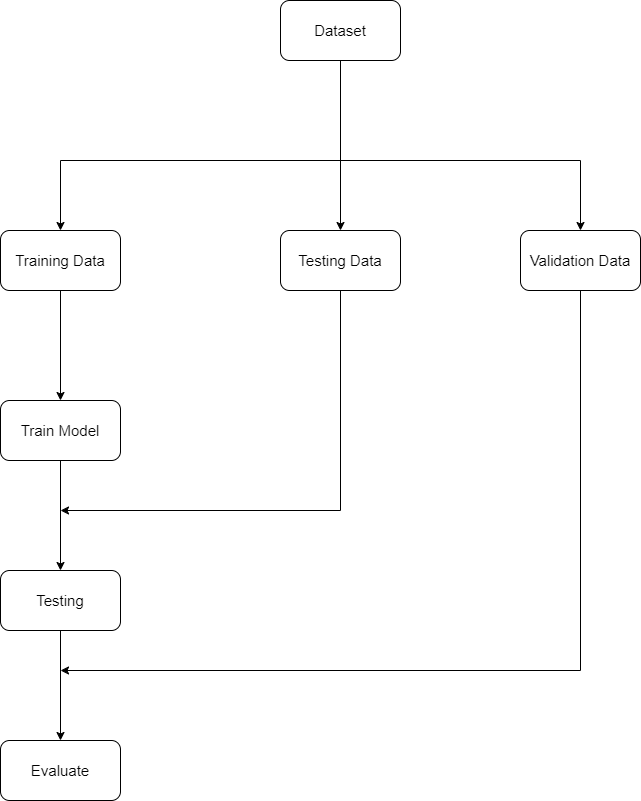

## Input Data

The input data is an spam mails dataset which has been taken from kaggle, the dataset is in the CSV format and includes three columns label of the email, text of the email and label number of the email if it is ham (not spam) or spam. (link: https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data)

Attributes in the dataset:
1. Email label: String data
2. Email text: String data
3. Classification: Integer data

Classification is labelled as:
1. The positive class “spam” is labelled as 1.
2. The negative class “ham” is labelled as 0.


### Exploring the Dataset

In [1]:
#import libraries

# Graph implementation 
import matplotlib.pyplot as plt
# data manipulation and analysis 
import pandas as pd 
# numerical operations and mathematical calculation
import numpy as np 

# used to balance out the dataset
from imblearn.over_sampling import RandomOverSampler

#data preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
from sklearn.model_selection import train_test_split

# importing the model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# show the most frequent words in the dataset
from wordcloud import WordCloud

# learning curve 
from sklearn.model_selection import learning_curve

# counfusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Loading the training dataset
spamEmailDataset = pd.read_csv('spam_&_ham_dataset.csv', names=[ "email_label", "email_text", "classification"])
# Removing the first index of the table
spamEmailDataset = spamEmailDataset.drop(spamEmailDataset.index[0])
# Exploring the dataset
spamEmailDataset.head()

,email_label,email_text,classification
605.0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349.0,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624.0,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685.0,spam,"Subject: photoshop , windows , office . cheap ...",1
2030.0,ham,Subject: re : indian springs\r\nthis deal is t...,0


The data consists of the following columns:

- **email_label**: Gives the subject of the email.
- **email_text**: Gives the subject of the email.
- **classification**: Classifies the email to be ham (0) or not spam (1). 


In [3]:
# Displaying the information of the dataset
spamEmailDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 605.0 to 4807.0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   email_label     5171 non-null   object
 1   email_text      5171 non-null   object
 2   classification  5171 non-null   object
dtypes: object(3)
memory usage: 161.6+ KB


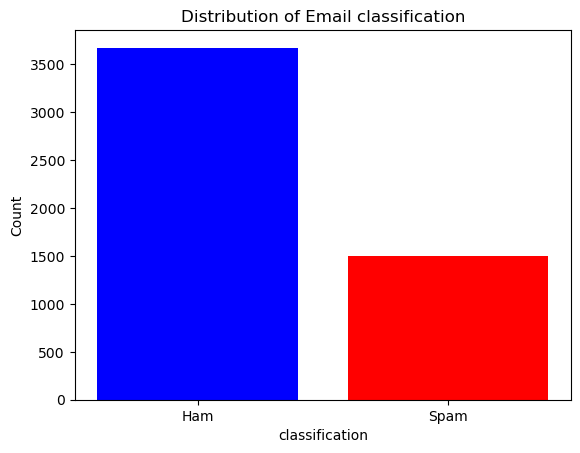

In [4]:
# Checking the distribution of the 'classification' column
distributions_of_classification = spamEmailDataset['classification'].value_counts()

# Plotting the distribution to identify if the dataset is balanced or not balanced
plt.bar(distributions_of_classification.index, distributions_of_classification.values, color=['blue', 'red'])
plt.xlabel('classification')
plt.ylabel('Count')
plt.title('Distribution of Email classification')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

### Preprocessing of the data 

Below are the techniques that were used for preprocessing for the Email Spam Classification dataset.

1. Balancing the dataset by Over Sampling.
2. Convert text into lowercase.
3. Tokenization of the dataset which means breaking down the text into individual words.
4. Lemmatization the dataset which is a process of simplifying words into their base form.
5. Stopword removal of common words that do have much meaning such as “and”, “the”, “is” etc.
6. Removing the punctuation within the sentences.
7. Vectorization is used to convert text data into numerical format that can be used by the algorithms.


In [5]:
# Separate the features and labels
X = spamEmailDataset[['email_text']]
y = spamEmailDataset['classification']

# Creating an instance of RandomOverSampler
overSampler = RandomOverSampler(random_state=42)

# Fit and transform the data using the sampler
X_resampled, y_resampled = overSampler.fit_resample(X, y)

# Combing the resampled data into a new DataFrame
balancedSpamEmailDataset = pd.concat([pd.DataFrame(X_resampled, columns=['email_text']), pd.DataFrame(y_resampled, columns=['classification'])], axis=1)

# Size of the balanced table 
balancedSpamEmailDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   email_text      7344 non-null   object
 1   classification  7344 non-null   object
dtypes: object(2)
memory usage: 114.9+ KB


In [6]:
balancedSpamEmailDataset.head()

,email_text,classification
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


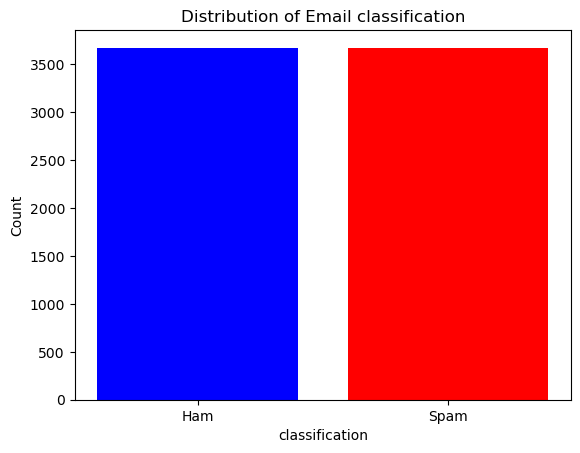

In [7]:
# Checking the distribution of the 'classification' column after balancing 
distributionBalancedDataset = balancedSpamEmailDataset['classification'].value_counts()

# Plotting the distribution to identify if the dataset is balanced or not balanced
plt.bar(distributionBalancedDataset.index, distributionBalancedDataset.values, color=['blue', 'red'])
plt.xlabel('classification')
plt.ylabel('Count')
plt.title('Distribution of Email classification')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [8]:
# Converting into lower case 
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].str.lower()

In [9]:
# Tokenization of the text into words
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].apply(word_tokenize)

In [10]:
# lemmatizing the words into their base form
lemmatizer = WordNetLemmatizer()
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [11]:
# Removing stopword that dont contribute much to the meaning
stop_words = set(stopwords.words('english'))
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [12]:
# Converting the preprocessed tokens back to text
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].apply(lambda x: ' '.join(x))

In [13]:
# Removing the punctuations in the dataset
balancedSpamEmailDataset['email_text'] = balancedSpamEmailDataset['email_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [14]:
# Vectorization convert text data into numerical format that can be used by the algorithms
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(balancedSpamEmailDataset['email_text'])

In [15]:
# Renaming the dataset 
preprocessedSpamEmailDataset = balancedSpamEmailDataset.copy()
preprocessedSpamEmailDataset.head()

,email_text,classification
0,subject enron methanol meter 988291 follow...,0
1,subject hpl nom january 9 2001 see attached...,0
2,subject neon retreat ho ho ho around wonder...,0
3,subject photoshop window office cheap mai...,1
4,subject indian spring deal book teco pvr rev...,0


### Visualization of the Dataset

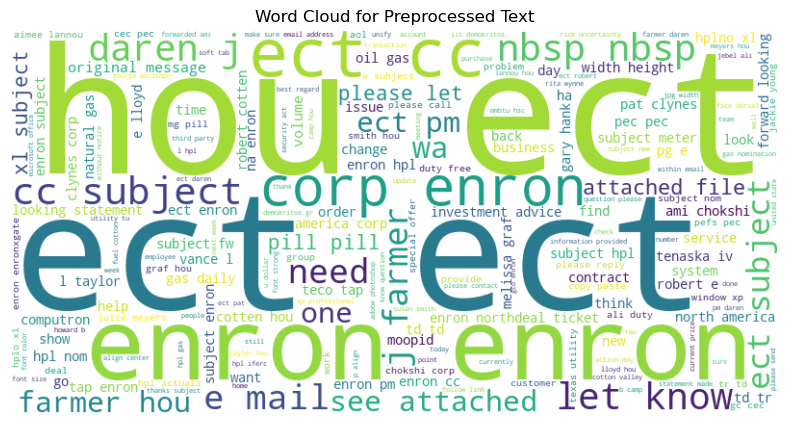

In [16]:
# Distribution of the words in the 'email_text'
textData = ' '.join(preprocessedSpamEmailDataset['email_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textData)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Preprocessed Text')
plt.axis('off')
plt.show()


### Splitting the dataset 

The training, testing and validation split of the dataset is in 80:10:10 ratio.  

In [17]:
# Assigning the columns 
X = preprocessedSpamEmailDataset['email_text']
Y = preprocessedSpamEmailDataset['classification']

# Splitting the data into training, validation, and testing sets
# test_size is determines the data that would be used for testing and since it is set to 0.2 which mean 20% will be used for the test and validation and 80% is used to train
# random_state parameter determines the random seed to shuffle the data before splitting it setting the random_state to a specific value will ensure that the same split of the data is produced every time the code is ran.
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Total X Rows:", len(X),'|',"Total Y Rows:", len(Y))
print("Total X Rows (80%):", len(X_train),'|',"Total Y Rows (80%):", len(Y_train))
print("Total X Rows (10%):", len(X_test),'|',"Total Y Rows (10%):", len(Y_test))
print("Total X Rows (10%):", len(X_val),'|',"Total Y Rows (10%):", len(Y_val))

Total X Rows: 7344 | Total Y Rows: 7344
Total X Rows (80%): 5875 | Total Y Rows (80%): 5875
Total X Rows (10%): 735 | Total Y Rows (10%): 735
Total X Rows (10%): 734 | Total Y Rows (10%): 734


### Training the dataset  

Logistic Regression Implementation

In [18]:
# Creating a pipeline with CountVectorizer and LogisticRegression
lr_model = make_pipeline(CountVectorizer(),LogisticRegression(random_state=42))

# Training the Logistic Regression model
lr_model.fit(X_train, Y_train)

# Evaluating the Logistic Regression model
Y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(Y_val, Y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9795640326975477


Naive Bayes Implementation

In [19]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

# Training a Naive Bayes classifier model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, Y_train)

# Evaluating the Naive Bayes classifier model
Y_val_pred = nb_model.predict(X_val_vectorized)
accuracy = accuracy_score(Y_val, Y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9673024523160763


Support Vector Machine Implementation

In [20]:
# Creating a pipeline with a TF-IDF vectorizer and an SVM classifier
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

# Training the Support Vector Machine model 
svm_model.fit(X_train, Y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear'))])

# Part D – Testing

The evaluation metrics used to test the model is noted below .

1. Evaluation accuracy used to measure the correctly classified instances out of the total instances.
2. Confusion Matrix used to show the number of true positives, true negatives, false positive, nad false negative predictions.
3. Testing on random spam and non spam emails.
4. Testing on test and validation split.

In [21]:
# Evaluation accuracy

# Evaluating the model on the train set
Y_train_pred = svm_model.predict(X_train)
trainAccuracy = accuracy_score(Y_train, Y_train_pred)
print("Train Accuracy:", trainAccuracy)

# Evaluating the model on the validation set
Y_val_pred = svm_model.predict(X_val)
valAccuracy = accuracy_score(Y_val, Y_val_pred)
print("Validation Accuracy:", valAccuracy)

# Evaluating the model on the test set
Y_test_pred = svm_model.predict(X_test)
testAccuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", testAccuracy)

Train Accuracy: 0.9991489361702127
Validation Accuracy: 0.989100817438692
Test Accuracy: 0.9891156462585035


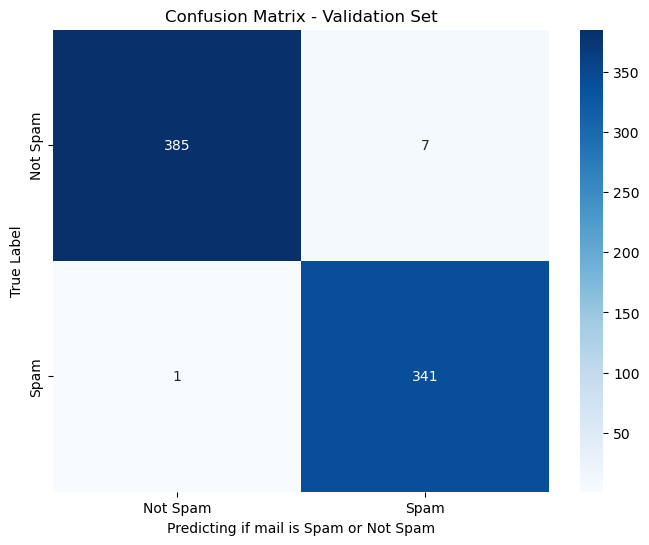

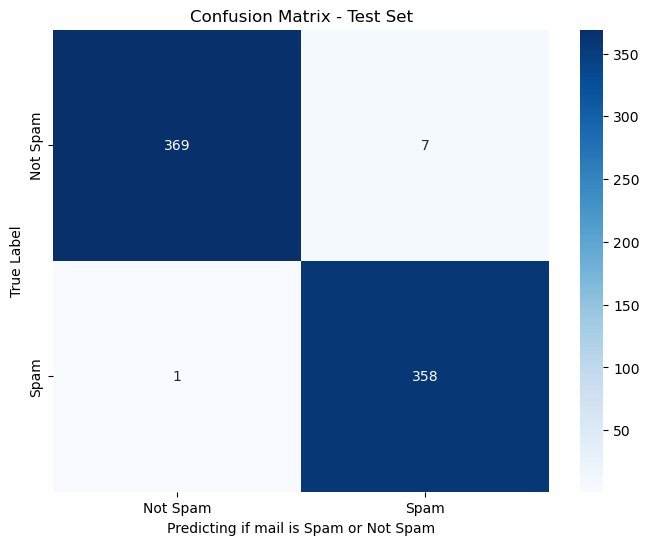

In [22]:
# Confusion matrix for the validation set
confMatrixVal = confusion_matrix(Y_val, Y_val_pred)
# Confusion matrix for the test set
confMatrixTest = confusion_matrix(Y_test, Y_test_pred)

# Plotting the confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confMatrixVal, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicting if mail is Spam or Not Spam")
plt.ylabel("True Label")
plt.show()

# Plotting the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(confMatrixTest, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicting if mail is Spam or Not Spam")
plt.ylabel("True Label")
plt.show()

In [23]:
# Testing on some random email
exampleMail = "URGENT: You've won a $1,000,000 cash prize! To claim your winnings, reply to this email with your bank details. Act now to secure your fortune!"
# Making a prediction from the trained model
prediction = svm_model.predict([exampleMail])
# Tells us if the email IS Spam(1) or Not Spam(0) 
print(f"Predicting if mail is Spam(1) or Not Spam(0) : {prediction[0]}")

Predicting if mail is Spam(1) or Not Spam(0) : 1


In [24]:
# Testing on some random email
exampleMail = "Congratulations! You've been selected as the winner of our exclusive prize. Claim your reward now by clicking the link below: www.spammylink.com"
# Making a prediction from the trained model
prediction = svm_model.predict([exampleMail])
# Tells us if the email IS Spam(1) or Not Spam(0) 
print(f"Predicting if mail is Spam(1) or Not Spam(0) : {prediction[0]}")

Predicting if mail is Spam(1) or Not Spam(0) : 1


In [25]:
# Testing on some random email
exampleMail = "Thank you for your recent purchase. We appreciate your business and hope you are satisfied with your product. If you have any questions or concerns, please don't hesitate to contact our customer support team."
# Making a prediction from the trained model
prediction = svm_model.predict([exampleMail])
# Tells us if the email IS Spam(1) or Not Spam(0) 
print(f"Predicting if mail is Spam(1) or Not Spam(0) : {prediction[0]}")

Predicting if mail is Spam(1) or Not Spam(0) : 0


In [26]:
# Testing on some random email
exampleMail = "Hello! Thank you for your recent purchase. We hope you enjoy your new product. If you have any questions or concerns, please feel free to contact our customer support. Have a great day!"
# Making a prediction from the trained model
prediction = svm_model.predict([exampleMail])
# Tells us if the email IS Spam(1) or Not Spam(0) 
print(f"Predicting if mail is Spam(1) or Not Spam(0) : {prediction[0]}")

Predicting if mail is Spam(1) or Not Spam(0) : 0


In [27]:
# Getting the predictions from the test set
predictionsFromModel = svm_model.predict(X_test)

# Creating a DataFrame to display the actual and predicted labels from the test 
predictionsFromModelResults = pd.DataFrame({'Email Text': X_test, 'Actual': Y_test, 'Predicted': predictionsFromModel})
print(predictionsFromModelResults)

# Counting the number of correct and incorrect predictions
correctPredictions = (Y_test == predictionsFromModel).sum()
incorrectPredictions = len(Y_test) - correctPredictions
print("Number Predictions of Correct:", correctPredictions)
print("Number Predictions of Incorrect:", incorrectPredictions)

                                             Email Text Actual Predicted
4963  subject  fw  megan pic       original message ...      0         0
2199  subject  deal 338634 meter 985077 deal wa syst...      0         0
1090  subject  entex apr 3 noms                     ...      0         0
503   subject  hpl nomination january 15 thru 17  20...      0         0
6223  subject  overseas pharmacy qc want inexpensive...      1         1
...                                                 ...    ...       ...
838   subject  let stuff make life better hello  wan...      1         1
6138  subject  send five motor att  client id 4551  ...      1         1
642   subject  job number job number 104210  posted ...      0         0
1871  subject  basf  freeport natural gas nomination...      0         0
5050  subject  office week july 17 th thru july 21 s...      0         0

[735 rows x 3 columns]
Number Predictions of Correct: 727
Number Predictions of Incorrect: 8


In [28]:
# Getting the predictions from the validation set
predictionsFromModel = svm_model.predict(X_val)

# Creating a DataFrame to display the actual and predicted labels from the validation 
predictionsFromModelResults = pd.DataFrame({'Email Text': X_val, 'Actual': Y_val, 'Predicted': predictionsFromModel})
print(predictionsFromModelResults)

# Counting the number of correct and incorrect predictions
correctPredictions = (Y_val == predictionsFromModel).sum()
incorrectPredictions = len(Y_val) - correctPredictions
print("Number Predictions of Correct:", correctPredictions)
print("Number Predictions of Incorrect:", incorrectPredictions)

                                             Email Text Actual Predicted
6016  subject  appeal  democrat daily  inspection pa...      1         1
3405  subject  please endeavour use charity   mr  ru...      1         1
487   subject  txu nom  9  28  00 l katy ic remain z...      0         0
4112                          subject  security warning      1         1
3956  subject  calpine daily gas nomination  ricky  ...      0         0
...                                                 ...    ...       ...
7002  subject  looking love  tonight  great dating s...      1         1
3520  subject  help husband pain man  pal v  1  c  0...      1         1
5327  subject  fw  hot teen peeing well well well  w...      1         1
4747  subject  revised july lst woodland            ...      0         0
5990  subject  cheapest med  find  discount drug    ...      1         1

[734 rows x 3 columns]
Number Predictions of Correct: 726
Number Predictions of Incorrect: 8


# Part E – Evaluate results.

### Accuracy score

A way to assess if the model that was used preformed as it was intended to can be done by accuracy score. It is used to represent the ratio of predicted instances that were made by the model and the models had a very strong accuracy of 98%.


### Confusion matrix

Its is a table that is used to assess the effectiveness of a classification model by displaying the model’s accuracy in terms of both accuracy and wrong predictions. 

True Positives (TP): There are the predictions where the used model correctly predicts the positive class.

False Positives (FP): There are the predictions where the used model incorrectly predicts the positive class.

False Negatives (FP): There are the predictions where the used model incorrectly predicts the negative class.

True Negatives (TN): There are the predictions where the used model correctly predicts the positive class.


### Random spam and non-spam emails 

A random email will be sent and used by to model in order to generate a response telling us if the detected email is spam or not and this was tested four times with two spam and not spam emails and both were predicted accurately.  


### Testing on test and validation set

The test and validation split result was used to show that the model accurately predicts whether the email text is spam or not spam and there were 727 correct predictions and only 8 incorrect predictions from the test set and 726 correct prediction and 8 incorrect predictions form the validation set which is a very good indication of accuracy from the svm model.

# References

G. V. Sesha Sai Krishna Vineeth, M. Leela Venkata Sai, M. U. Mahesh, M. Varun and S. Shanmugapriya, 2023, Email Spam: A New Strategy of Screening Spam Emails using Natural Language Processing.
https://ieeexplore.ieee.org/document/10073758

P. Xiu-li, F. Yu-qiang and J. Wei, 2007, A Chinese Anti-Spam Filter Approach Based on Support Vector Machine.
https://ieeexplore.ieee.org/document/4421831

P. Nagaraj, V. Muneeswaran, G. Shyam Sundar Reddy, V. Bharath Kumar, B. Madhan Mohan and S. Kumar, 2023, Automatic Email Spam Classification Using Naïve Bayes.
https://ieeexplore.ieee.org/document/10128233

A. Alzahrani and D. B. Rawat, 2019, Comparative Study of Machine Learning Algorithms for SMS Spam Detection.
https://ieeexplore.ieee.org/document/9020530

K. V. Bhavitha and S. J. J. Thangaraj, 2022, Novel Detection of Accurate Spam Content using Logistic Regression Algorithm Compared with Gaussian Algorithm. 
https://ieeexplore.ieee.org/document/9759003